<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Assume the following sample points for input x and output y in the data set where p$_i$=($x_i$, y$_i$).
### &emsp;&emsp;&emsp; p$_1$ =(6,21); p$_2$ =(10,40); p$_3$ =(12,9); p$_4$ =(18,18); p$_5$ =(20,60); p$_6$ =(25,61)

## 1) Write the X and Y matrices needed in the Normal Equation.

In [17]:
# Given Data Points
points = np.array([[6, 21],
                   [10, 40],
                   [12, 9],
                   [18, 18],
                   [20, 60],
                   [25, 61]])

# Extracting x and y from the points
x_values = points[:, 0]
y_values = points[:, 1]

# Creating X Matrix (Adding a column of ones to the input samples for the bias term)
X = np.c_[np.ones((len(points), 1)), x_values]

# Creating Y Matrix
Y = y_values.reshape(-1, 1)

# Printing the X and Y matrices with explicit float formatting
print("X Matrix:")
print(np.array_str(X, precision=1))
print("\nY Matrix:")
print(np.array_str(Y, precision=1))

X Matrix:
[[ 1.  6.]
 [ 1. 10.]
 [ 1. 12.]
 [ 1. 18.]
 [ 1. 20.]
 [ 1. 25.]]

Y Matrix:
[[21]
 [40]
 [ 9]
 [18]
 [60]
 [61]]


## 2) Calculate the parameters of the best linear model representing them.

In [18]:
# Calculating the parameters theta using the Normal Equation
theta_best = np.linalg.inv(np.transpose(X).dot(X)).dot(X.T).dot(Y)

print(f'θ₀ (Bias / Intercept): {theta_best[0][0]:.2f}')
print(f'θ₁ (Slope): {theta_best[1][0]:.2f}')


θ₀ (Bias / Intercept): 3.56
θ₁ (Slope): 2.06


##3) Estimate the output at these input points.

In [19]:
# Estimating the output using the calculated parameters theta_best
estimated_output_best = X @ theta_best

# Creating a formatted string for printing the estimated outputs
estimated_output_str_best = '\n'.join([f'p{i+1} = [{x[1]:.1f}, {y[0]:.1f}]' for i, (x, y) in enumerate(zip(X, estimated_output_best))])

print("Estimated Outputs at Given Input Points with theta_best:")
print(estimated_output_str_best)


Estimated Outputs at Given Input Points with theta_best:
p1 = [6.0, 15.9]
p2 = [10.0, 24.2]
p3 = [12.0, 28.3]
p4 = [18.0, 40.7]
p5 = [20.0, 44.8]
p6 = [25.0, 55.1]


##4) Calculate the MSE cost function for this set of data.

In [20]:
# Calculating the Mean Squared Error (MSE) for the estimated outputs obtained with theta_best
mse_best = np.mean((Y - estimated_output_best) ** 2)

print(f'Mean Squared Error (MSE) with theta_best: {mse_best:.2f}')


Mean Squared Error (MSE) with theta_best: 238.09


## 5) Plot the actual (ground truth) output (output given for each sample point in the data set) and the estimated output versus input in one figure. Use a scatter plot and also use two different colors for the actual and estimated data points.

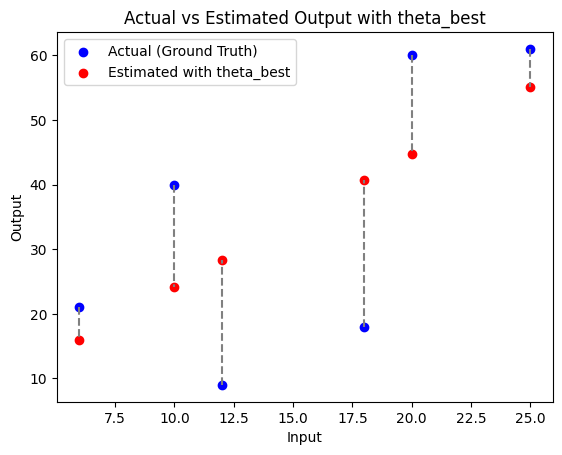

In [21]:
# Extracting estimated y values from the estimated_output_best array
estimated_y_values_best = estimated_output_best.flatten()

# Plotting the Actual outputs (Ground Truth)
plt.scatter(x_values, y_values, color='blue', label='Actual (Ground Truth)')

# Plotting the Estimated outputs obtained with theta_best
plt.scatter(x_values, estimated_y_values_best, color='red', label='Estimated with theta_best')

# Drawing the lines connecting Actual and Estimated outputs for each input point
for x, y_actual, y_estimated in zip(x_values, y_values, estimated_y_values_best):
    plt.plot([x, x], [y_actual, y_estimated], color='gray', linestyle='dashed')

# Labeling the axes and the plot
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs Estimated Output with theta_best')
plt.legend()

# Displaying the plot
plt.show()


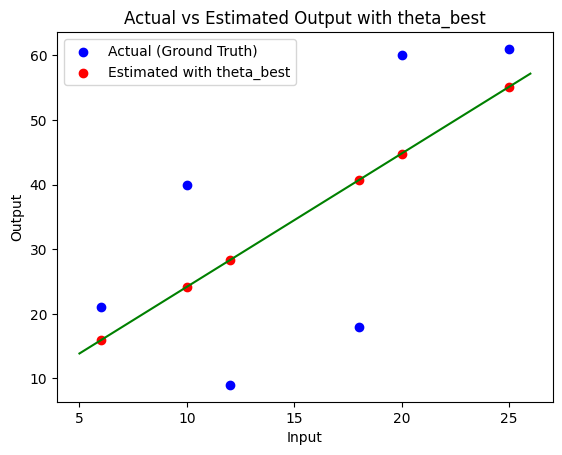

In [25]:
# Extending the range of x_line a bit more on both ends to ensure the line is visible
x_min = np.min(x_values) - 1  # Subtracting 1 to extend the range on the left
x_max = np.max(x_values) + 1  # Adding 1 to extend the range on the right

# Creating equally spaced points for x within the extended range
x_line = np.linspace(x_min, x_max, 1000)

# Assuming theta_best is already calculated in your code
# Calculating corresponding y values using the linear model
y_line = theta_best[0] + theta_best[1] * x_line

# Plotting the Actual outputs (Ground Truth)
plt.scatter(x_values, y_values, color='blue', label='Actual (Ground Truth)')

# Plotting the Estimated outputs obtained with theta_best
plt.scatter(x_values, estimated_y_values_best, color='red', label='Estimated with theta_best')

# Drawing the continuous line representing the linear model
plt.plot(x_line, y_line, color='green', linestyle='-')  # Using a distinct color for the line

# Labeling the axes and the plot
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Actual vs Estimated Output with theta_best')
plt.legend()

# Displaying the plot
plt.show()
